# The Jam Machine 

In this notebook, you can:

- Train the-jam-machine model on your own music dataset from stratch 

- Generate music using the-jam machine *A-lot-TODO 

- Finetune a pretrained the-jam-machine model with an additional dataset *TODO

Check the-jam-machine on [GitHub](https://github.com/m41w4r3exe/the-jam-machine)


In [2]:
## THIS NEEDS TO BE CLEANED - NOT EVERYTHING IS NECESSARY
# basic packages requirements
!pip install wandb
import os
from pathlib import Path
import glob
import random
import shutil
import tqdm
import matplotlib.pyplot as plt
import typing
# tensorflow
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras import models, layers
tf.config.list_physical_devices("GPU")
# transformers
!pip install transformers tokenizers
from transformers import PreTrainedTokenizerFast
from transformers import DataCollatorForLanguageModeling
from transformers import GPT2Config, GPT2LMHeadModel
from transformers import TrainingArguments, Trainer
# tokenizer
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
# torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 4.8 MB/s 
     |████████████████████████████████| 182 kB 89.9 MB/s 
     |████████████████████████████████| 168 kB 81.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 92.4 MB/s 
     |████████████████████████████████| 166 kB 70.8 MB/s 
     |████████████████████████████████| 166 kB 88.0 MB/s 
     |████████████████████████████████| 162 kB 71.1 MB/s 
     |████████████████████████████████| 162 kB 84.3 MB/s 
     |████████████████████████████████| 158 kB 88.5 MB/s 
     |████████████████████████████████| 157 kB 86.9 MB/s 
     |████████████████████████████████| 157 kB 96.4 MB/s 
     |████████████████████████████████| 157 kB 69.6 MB/s 
     |████████████████████████████████| 157 kB 60.4 MB/s 
     |████████████████████████████████| 157 kB 74.3 MB/s 
     |████████████████████████████

In [3]:
#@title Setup requirements
!git clone https://github.com/m41w4r3exe/the-jam-machine.git

Cloning into 'the-jam-machine'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 251 (delta 133), reused 184 (delta 76), pack-reused 0
Receiving objects: 100% (251/251), 11.93 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [4]:
# move into the git folder to have all scripts in the local folder
os.chdir("./the-jam-machine")

In [5]:
# check that we re in the right happy place
print(f"Current working directory: {os.getcwd()}")
print(f"Files and Folders in directory:")
os.listdir()

Current working directory: /content/the-jam-machine
Files and Folders in directory:


['.gitignore',
 'midi',
 'notebooks',
 'encoder_mumidi.py',
 'encoder_mlike.py',
 'notes',
 'utils.py',
 'README.md',
 'encoder_oct.py',
 '.vscode',
 '.git',
 'encoding.py',
 'genre_prediction']

In [6]:
# install requirements
# !pipenv lock -r > requirements.txt
# !pip install -r requirements.txt

Have a folder ready with a collection of midi files to train on colab, in a google drive folder

In [7]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# path = Path('/gdrive/My Drive/')
# drive_jam_machine_path = Path("/content/drive/MyDrive/the_jam_machine")
# data_path = Path(f"{drive_jam_machine_path}/data") 
drive_path = Path("/content/drive/MyDrive/the_jam_machine/")
midi_path = Path(f"{drive_path}/midi_data")
# encoded_midi_path = Path(f"{drive_path}/midi_encoded")
encoded_midi_path = Path(f"{drive_path}/midi_encoded_by_tristan")
tokenizer_path = Path(f"{drive_path}/tokenizer")
model_path = Path(f"{drive_path}/model_jean")

In [8]:
# #@title Path definition

# #@markdown Specify the path of the audio files to use preprocess for training
# midi_path = Path("/content/drive/MyDrive/the_jam_machine/midi_data") #@param {type:"string"}

# #@markdown (Optional) If you wish to save encodings to a different folder (maybe to your google drive to re-use them later) specify a path here
# encoded_midi_path = Path("/content/drive/MyDrive/the_jam_machine/midi_encoded") #@param {type:"string"}

# Encoding Midi into Text (Done already)
from `mymusic.mid` files from `midi_path` to `music.txt` files in `encoded_midi_path`

In [10]:
#@title File encoding
#!python encoder_mlike.py --midi_path {midi_path} --encoded_midi_path {encoded_midi_path}

# Dataset
- load the encoded data
- training set - ?? % (done already by Tristan's encoding)
- validation set - ?? % (done already by Tristan's encoding)

- Tokenizing


## Loading the data

Define data path

In [9]:
dataset_path = encoded_midi_path;
dataset_path_all = os.path.join(dataset_path, "all")
dataset_path_train = os.path.join(dataset_path, "train")
dataset_path_valid = os.path.join(dataset_path, "valid")

Training and Validation set definition

In [12]:
# TO DO - Tristan's dataset is already splitted - code here

Define individual path for every files

In [10]:
# write full filepath to list
def full_filepath_to_list(dataset_folder, file_limit=20):
  dataset_files = os.listdir(dataset_folder)
  dataset_files = [f"{dataset_folder}/{file}" for count, file in enumerate(dataset_files) if count < file_limit]
  print(dataset_files)
  return dataset_files

# dataset root folder
# print(os.listdir(dataset_path))
# files_all = full_filepath_to_list(dataset_path_all) # all files
files_train = full_filepath_to_list(dataset_path_train) # training set
files_valid = full_filepath_to_list(dataset_path_valid) # validation set

['/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-2.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-4.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-6.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-1.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-9.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-7.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-8.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-3.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-0.txt', '/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tristan/train/token-sequences-5.txt']
['/content/drive/MyDrive/the_jam_machine/midi_encoded_by_tr

## Put data into dictionnary

In [11]:
# TO CHANGE  - this will probably give us some memory issues 
# Dictionnary stage to skip here and load the date into the tokenizer directly from the text files
# show the first 2 items
def show_n_first_dataset_entries(dataset, n=2):
  for idx, key in enumerate(dataset.values()):
    if idx >= n:
      break
    else:
      print(key)

def dataset_in_dictionary(files):
  dataset_dict = {}
  for count, file in enumerate(files):
    filename = file.split("/")
    file_content = open(file, "r")
    while True:
      count += 1
      line =  file_content.readline().rstrip("\n") 
       
      if not line: # break when file is over
        break

      dataset_dict[f"filename[-1]_{count}"] = line

  show_n_first_dataset_entries(dataset_dict, n=2)

  return dataset_dict

print("=============")
print("Training data")
print("=============")
dataset_train_dict = dataset_in_dictionary(files_train)
print("===============")
print("Validation data")
print("===============")
dataset_valid_dict = dataset_in_dictionary(files_valid)

Training data
PIECE_START TRACK_START INST=49 DENSITY=0 BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START TIME_DELTA=6 NOTE_ON=61 TIME_DELTA=1 NOTE_OFF=61 NOTE_ON=63 TIME_DELTA=1 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=1 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=1 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=1 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=1 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=4 NOTE_OFF=68 BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_START INST=35 DENSITY=0 BAR_START BAR_END BAR_START BAR_END BAR_START NOTE_ON=42 TIME_DELTA=1 NOTE_OFF=42 NOTE_ON=49 TIME_DELTA=2 NOTE_OFF=49 NOTE_ON=42 TIME_DELTA=1 NOTE_OFF=42 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=52 TIME_DELTA=2 NOTE_OFF=52 NOTE_ON=42 TIME_DELTA=2 NOTE_OFF=42 BAR_END BAR_START NOTE_ON=47 TIME_DELTA=12 NOTE_OFF=47 BAR_END BAR_START NOTE_ON=28 TIME_DELTA=1 NOTE_OFF=28 BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_START INST

# Tokenizer



In [12]:
# defined in an earlier cell
# tokenizer_path = Path(f"{drive_path}/tokenizer")
tokenizer_path = tokenizer_path
tokenizer_file = "tokenizer.json"

## Train the TOKENIZER

In [13]:
#do we train from scratch?
train_from_scratch = True

In [14]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import WhitespaceSplit
from tokenizers.trainers import WordLevelTrainer
from transformers import PreTrainedTokenizerFast


# making an iterator to go through the dictionary 
# CHANG THIS TO LOAD DIRECTLY FROM THE FILES TO SAVE MEMORY
def get_training_corpus():
    for song in dataset_train_dict.values():
        yield song

def define_and_save_tokenizer(
  saved_tokenizer="tokenizer.json", 
  tokenizer_path="./"
):
  # using a Word Level Tokemizer
  tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
  # separating vocabulary on whitespaces (pretokenizer)
  tokenizer.pre_tokenizer = WhitespaceSplit()
  # set up the trainer 
  trainer = WordLevelTrainer(
      special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]
  )
  # special tokens I took the ones tristan used but I am not sure I understand all of them 
  # [UNK] always need and UNK token
  # [PAD] if we need to do some pading
  # [MASK] if when we need to mask, in order to predict the future without seeing it
  # [CLS] what is it ?
  # [SEP] what is it ?

  # get corpus
  training_corpus = get_training_corpus()
  # train tokenizer
  tokenizer.train_from_iterator(training_corpus, trainer=trainer)
  # save tokenizer
  tokenizer.save(f"{tokenizer_path}/{saved_tokenizer}")

  return tokenizer

if train_from_scratch:
  tokenizer = define_and_save_tokenizer(tokenizer_path=tokenizer_path)


## Or load the trained tokenizer


In [31]:
if not train_from_scratch:
  from transformers import PreTrainedTokenizerFast
  tokenizer = PreTrainedTokenizerFast(tokenizer_file=f"{tokenizer_path}/{tokenizer_file}")

 ## Make it ready for GPT2 : add the pad_token

In [15]:
def format_tokenizer_for_transformers_classes(saved_tokenizer="tokenizer.json"):
  # PreTrainedTokenizerFast makes the tokenizer usable by the transformer
  tokenizer = PreTrainedTokenizerFast(tokenizer_file = saved_tokenizer)
  tokenizer.add_special_tokens({'pad_token': '[PAD]'})

  return tokenizer

tokenizer = format_tokenizer_for_transformers_classes(
    saved_tokenizer=f"{tokenizer_path}/{tokenizer_file}"
)

## Visualize the Vocabulary

In [17]:
print(tokenizer.vocab_size)
print(tokenizer.get_vocab())


391
{'NOTE_OFF=120': 372, 'INST=103': 252, 'INST=93': 276, 'NOTE_ON=53': 68, 'NOTE_ON=61': 46, 'TIME_DELTA=14': 142, 'INST=54': 213, 'NOTE_OFF=103': 229, 'INST=73': 205, 'NOTE_OFF=124': 330, 'TIME_DELTA=6': 85, 'TIME_DELTA=7': 128, 'INST=34': 183, 'NOTE_OFF=92': 199, 'INST=52': 192, 'INST=55': 263, '[PAD]': 3, 'NOTE_ON=11': 382, 'NOTE_ON=69': 38, 'TRACK_START': 56, 'NOTE_ON=67': 52, 'INST=3': 303, 'BAR_END': 7, 'NOTE_OFF=28': 96, 'NOTE_OFF=104': 322, 'INST=77': 327, 'NOTE_OFF=11': 380, 'NOTE_ON=38': 15, 'NOTE_ON=21': 254, 'NOTE_ON=120': 373, 'NOTE_ON=35': 21, 'NOTE_ON=39': 87, 'INST=20': 287, 'INST=97': 356, 'NOTE_ON=82': 101, 'NOTE_ON=96': 181, 'INST=100': 233, 'NOTE_ON=54': 24, 'NOTE_OFF=110': 283, 'NOTE_OFF=57': 18, 'INST=72': 377, 'NOTE_ON=14': 350, 'DENSITY=3': 123, '[MASK]': 4, 'NOTE_OFF=61': 45, 'DENSITY=1': 127, 'INST=7': 237, 'NOTE_OFF=99': 293, 'NOTE_ON=0': 368, 'NOTE_ON=66': 48, 'NOTE_ON=62': 30, 'NOTE_OFF=74': 88, 'NOTE_ON=94': 215, 'INST=64': 251, 'NOTE_ON=23': 189, 'NOTE_

## Tokenize the DATASET and prepare it for the model

In [20]:
def tokenize_function(data_to_tokenize):
  # this make the tokenized data ready for the model that requires a
    tokenized_data = tokenizer(
        data_to_tokenize,
        truncation=True,
        padding=True,
        max_length=512,
    ) 
    return {
        "input_ids": tokenized_data["input_ids"]
    } 

# tokenize a dataset_dictionnary
def tokenize_dataset(dataset_dictionary, tokenizer, limit=None):
  if limit is None:
    limit = len(dataset_dictionary.items())

  tokenized_dictionary=[]
  for idx, file in enumerate(dataset_dictionary.values()):
    # print(file)
    if idx<limit:
      tokenized_dictionary.append(tokenize_function(file))
      # print(encoded_file)

  return tokenized_dictionary

# just use 10000 sequences for now
dataset_train_tokenized = tokenize_dataset(dataset_train_dict,tokenizer, limit=10000)
# len(dataset_train_tokenized)
dataset_val_tokenized = tokenize_dataset(dataset_valid_dict,tokenizer, limit=10000)

In [23]:
# checking that the data is in the correct shape to be input to the model
assert list(dataset_train_tokenized[0]) == ["input_ids"], list(dataset_train_tokenized[0])
print(type(dataset_train_tokenized[0]))
# Check a few samples
for i, ii in enumerate(dataset_train_dict.values()):
  if i > 4: # print only the first 5
    break
  else: 
    print("----")
    print(ii)
    print(dataset_train_tokenized[i])

<class 'dict'>
----
PIECE_START TRACK_START INST=49 DENSITY=0 BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START TIME_DELTA=6 NOTE_ON=61 TIME_DELTA=1 NOTE_OFF=61 NOTE_ON=63 TIME_DELTA=1 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=1 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=1 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=1 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=1 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=4 NOTE_OFF=68 BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_START INST=35 DENSITY=0 BAR_START BAR_END BAR_START BAR_END BAR_START NOTE_ON=42 TIME_DELTA=1 NOTE_OFF=42 NOTE_ON=49 TIME_DELTA=2 NOTE_OFF=49 NOTE_ON=42 TIME_DELTA=1 NOTE_OFF=42 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=52 TIME_DELTA=2 NOTE_OFF=52 NOTE_ON=42 TIME_DELTA=2 NOTE_OFF=42 BAR_END BAR_START NOTE_ON=47 TIME_DELTA=12 NOTE_OFF=47 BAR_END BAR_START NOTE_ON=28 TIME_DELTA=1 NOTE_OFF=28 BAR_END BAR_START BAR_END BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_STAR

# Define the model

## Data collator.
[Huggingface](https://huggingface.co/transformers/v4.8.1/main_classes/data_collator.html)

"
Data collators are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.

To be able to build batches, data collators may apply some processing (like padding). Some of them (like DataCollatorForLanguageModeling) also apply some random data augmentation (like random masking) oin the formed batch.
"

"
**class transformers.data.data_collator.DataCollatorForLanguageModeling**
- tokenizer (PreTrainedTokenizer or PreTrainedTokenizerFast) – The tokenizer used for encoding the data.
- mlm (bool, optional, defaults to True) – Whether or not to use masked language modeling. If set to False, the labels are the same as the inputs with the padding tokens ignored (by setting them to -100). Otherwise, the labels are -100 for non-masked tokens and the value to predict for the masked token"

In [24]:
from transformers import DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

## Predicting the next note using GPT2
[HuggingFace](https://huggingface.co/transformers/v4.8.1/task_summary.html#)

[Class GPT2Config](https://huggingface.co/transformers/v2.5.0/_modules/transformers/configuration_gpt2.html)
This is the config that needs to be passed to GPT2Model Classes.

[Class GPT2LMHeadModel](https://huggingface.co/docs/transformers/model_doc/gpt2#transformers.GPT2LMHeadModel)
Here we use the GPT2 Model transformer with a language modeling head on top (linear layer with weights tied to the input embeddings).



In [25]:
from transformers import GPT2Config, GPT2LMHeadModel

model_config = GPT2Config(
    vocab_size=tokenizer.vocab_size,
    pad_token_id=tokenizer.pad_token_id,
    n_ctx=512,
    n_embd=512,
    n_head=8,
    n_layer=10,
    n_positions=512,
)
model = GPT2LMHeadModel(model_config)
model.config

GPT2Config {
  "activation_function": "gelu_new",
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 512,
  "n_embd": 512,
  "n_head": 8,
  "n_inner": null,
  "n_layer": 10,
  "n_positions": 512,
  "pad_token_id": 3,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.24.0",
  "use_cache": true,
  "vocab_size": 391
}

# Testing the-jam-machine
Tristan's script

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


input_ids: tensor([[137,  56, 156, 129,   8,   7,   8, 103,  11, 102,   7,   8,   7,   8,
         103,  11, 102,   7,   8,   7,   8, 103,  11, 102,   7,   8,   7,   8,
         103,  11, 102,   7,  55,  56, 155, 127,   8,   6,  78,   5,  77,   6,
          78,   5,  77,   6,  99,   5,  98,   6,  78,   5,  77,   7,   8,  78,
          11,  77,  78,   6, 111,  54,   6,  77, 110,  53,  99,   6,  98,  54,
           6,  53,  78,  22,  77,   7,   8,   6,  78,   6,  77,   6,  78,   6,
          77,   5,  78,   5,  77,   7,   8,  78,   6,  77,  54,   6,  53,  99,
          11,  98,  99,   6,  98,  54,   5,  53,  78,   6,  77,  48,  22,  47,
           7,   8,  48,   5,  47,  78,   6,  77,  99,   6,  98,  78,   5,  77,
          54,   5,  53,  11,  48,  22,  47,   5,  99,   5,  98,   7,   8,  99,
          85,  98,  22,  99,   6,  98,   5,  78,   6,  77,   7,   8,   5,  78,
           5,  77,   5,  78,   6,  77,   6,  78,   5,  77,   7,   8,  90,  78,
          90,  77,   7,  55,  56, 156, 12

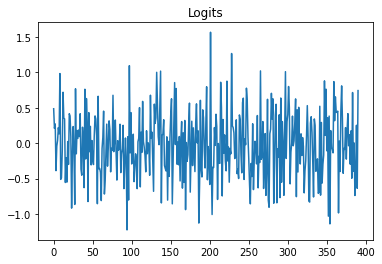

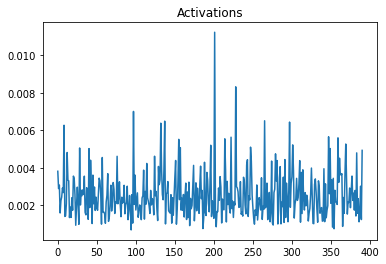

In [26]:
import random
import matplotlib.pyplot as plt
import torch

inputs = [random.choice(dataset_train_tokenized)]
inputs = data_collator(inputs)
assert list(inputs.keys()) == ["input_ids", "attention_mask", "labels"], list(inputs.keys())
print("input_ids:", inputs["input_ids"])
print("")

outputs = model(**inputs)
assert list(outputs.keys()) == ["loss", "logits", "past_key_values"], list(outputs.keys())
print("logits:", outputs["logits"])

plt.plot(outputs["logits"].detach().numpy()[0][0])
plt.title("Logits")
plt.show()
plt.close()

activations = torch.nn.functional.softmax(outputs["logits"], dim=-1)
plt.plot(activations.detach().numpy()[0][0])
plt.title("Activations")
plt.show()
plt.close()

## Generating from a given input

In [27]:
def tokenize_text_input(text_input, verbose=True, model=model, tokenizer=tokenizer):
  input_ids = tokenizer.encode(text_input, return_tensors="pt")#.cuda()
  if verbose:
    print(f"inputs: {tokenizer.decode(input_ids[0])}")
  return input_ids

def generate_the_next_bars(input_ids, verbose=False, model=model, tokenizer=tokenizer):
  generated_ids = model.generate(
    input_ids,
    max_length=512,
    do_sample=True,
    temperature=0.75,
    eos_token_id=tokenizer.encode("TRACK_END")[0] 
)
  if verbose:
    print(f"output: {generated_ids}")
  return generated_ids

def convert_ids_to_text(generated_ids, verbose=True, tokenizer=tokenizer):
  generated_text = tokenizer.decode(generated_ids[0])
  if verbose:
    print(f"output: {generated_text}")
  return generated_text

# To generate, Run:
# input_ids = tokenize_text_input(text_input, model=model, tokenizer=tokenizer)
# generated_ids = generate_the_next_bars(input_ids, model=model, tokenizer=tokenizer)
# generated_text = convert_ids_to_text(generated_ids, tokenizer=tokenizer)

In [28]:
# Generated from the untrained model
text_input = "PIECE_START TRACK_START INST=25"
input_ids = tokenize_text_input(text_input, model=model, tokenizer=tokenizer)
generated_ids = generate_the_next_bars(input_ids, model=model, tokenizer=tokenizer)
generated_text = convert_ids_to_text(generated_ids, tokenizer=tokenizer)

inputs: PIECE_START TRACK_START INST=25
output: PIECE_START TRACK_START INST=25 DENSITY=2 NOTE_OFF=127 NOTE_ON=83 NOTE_OFF=56 INST=13 INST=88 NOTE_ON=107 NOTE_ON=107 NOTE_OFF=9 INST=81 NOTE_ON=107 NOTE_OFF=25 NOTE_OFF=71 INST=108 INST=0 NOTE_OFF=63 NOTE_OFF=9 INST=2 INST=2 NOTE_OFF=80 NOTE_OFF=26 NOTE_ON=107 INST=121 NOTE_ON=127 NOTE_OFF=65 NOTE_OFF=78 NOTE_ON=65 NOTE_OFF=41 NOTE_ON=65 NOTE_ON=67 NOTE_OFF=126 NOTE_OFF=102 INST=104 NOTE_OFF=9 NOTE_OFF=99 INST=12 NOTE_OFF=126 NOTE_ON=47 TIME_DELTA=10 INST=30 NOTE_OFF=67 NOTE_ON=51 NOTE_ON=51 NOTE_ON=39 NOTE_ON=21 NOTE_ON=21 NOTE_ON=94 TIME_DELTA=10 NOTE_OFF=44 NOTE_OFF=124 TIME_DELTA=9 INST=4 INST=50 NOTE_ON=37 TIME_DELTA=4 NOTE_OFF=99 NOTE_ON=102 NOTE_ON=107 NOTE_OFF=46 [UNK] NOTE_OFF=61 NOTE_OFF=26 INST=107 NOTE_ON=65 NOTE_OFF=51 INST=80 NOTE_OFF=37 NOTE_ON=122 NOTE_OFF=8 NOTE_OFF=71 [CLS] NOTE_OFF=16 NOTE_ON=9 NOTE_ON=107 INST=78 NOTE_OFF=77 NOTE_ON=47 NOTE_ON=33 INST=99 TIME_DELTA=10 NOTE_OFF=74 NOTE_ON=4 INST=18 NOTE_OFF=47 NOTE_OFF

# Train the-jam-machine
Tristan's script

In [29]:
# do we train from scratch?
train_from_scratch = True
train_from_scratch = train_from_scratch
#imports
from transformers import TrainingArguments, Trainer
import os

Check those links (Hugging Face): 
- [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer)

- [TrainingArguments](https://huggingface.co/transformers/v4.3.3/_modules/transformers/training_args.html)

In [30]:
# Weight and Biases
# 6516b30c7d28dad345f2941a014e623fac328f73
import wandb
# wandb.log
wandb.init(project="the-jam-machine-test")

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [27]:
# GPU troubvleshooting
# !nvidia-smi
# !kill process_id
# !ps -aux|grep python
# !torch.cuda.memory_summary()

## Train from scratch

In [31]:
train_from_this_checkpoint = None
train_from_this_checkpoint_model_path = model_path
train_from_this_checkpoint_model_path

PosixPath('/content/drive/MyDrive/the_jam_machine/model_jean')

## Train from a checkpoint

In [63]:
# train_from_scratch = True
if not train_from_scratch:
  train_from_this_checkpoint_model_path = "/content/drive/MyDrive/the_jam_machine/model_jean"
  train_from_this_checkpoint = "checkpoint-7000"
  additionnal_epochs_to_run = 4

In [33]:
# Create the trainer.
print("Creating trainer...")
steps = 500
num_train_epochs = 10
output_path = train_from_this_checkpoint_model_path

training_args = TrainingArguments(
    output_dir=output_path, # where model and checkpoints will be saved
    overwrite_output_dir=True,# self-explanatory
    num_train_epochs=num_train_epochs, # defaults to 3.0
    evaluation_strategy="steps", # Evaluation is done (and logged) every eval_steps (so not at the end of every epoch)
    eval_steps=steps, # Number of update steps (backprob) between two evaluations
    learning_rate=5e-5, #initial learning rate for :class:`~transformers.AdamW` optimizer.
    per_device_train_batch_size=12, #default value is 8
    # per_device_eval_batch_size=12, #default value is 8
    seed=42, # default seed=42
    save_strategy="steps", # 
    save_steps=steps,
    save_total_limit=20,
    logging_strategy="steps",
    logging_first_step=True,
    logging_steps=steps,
    logging_dir=os.path.join(output_path, "logs"),
    prediction_loss_only=False,
    report_to="wandb",
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset_train_tokenized,
    eval_dataset=dataset_val_tokenized,
)

  # Train the model.
if train_from_scratch:
  trainer.train()
else:
  if train_from_this_checkpoint is not None:
    trainer.args.num_train_epochs += additionnal_epochs_to_run
    trainer.train(f"{train_from_this_checkpoint_model_path}/{train_from_this_checkpoint}/")
  else:
    pass
    
# Save the tokenizer.
tokenizer.save_pretrained(output_path)

# Save the model.
model.save_pretrained(output_path)

PyTorch: setting up devices
***** Running training *****
  Num examples = 10000
  Num Epochs = 10
  Instantaneous batch size per device = 12
  Total train batch size (w. parallel, distributed & accumulation) = 12
  Gradient Accumulation steps = 1
  Total optimization steps = 8340
  Number of trainable parameters = 31987200
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


Creating trainer...


Step,Training Loss,Validation Loss
500,2.696300,2.333065
1000,1.855200,1.980751
1500,1.528800,1.690123
2000,1.270800,1.387374
2500,1.103900,1.213828
3000,0.965800,1.134698
3500,0.883600,1.087619
4000,0.802400,1.027404
4500,0.754600,1.020420
5000,0.695700,1.015982


***** Running Evaluation *****
  Num examples = 506
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-500
Configuration saved in /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-500/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 506
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-1000
Configuration saved in /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-1000/config.json
Model weights saved in /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 506
  Batch size = 8
Saving model checkpoint to /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-1500
Configuration saved in /content/drive/MyDrive/the_jam_machine/model_jean/checkpoint-1500/config.json


# Generate from the-jam-machine

### Generate from the model just trained

In [36]:
text_input = "PIECE_START TRACK_START INST=25"
input_ids = tokenize_text_input(text_input, model=model, tokenizer=tokenizer).cuda()
generated_ids = generate_the_next_bars(input_ids, model=model, tokenizer=tokenizer)
generated_text = convert_ids_to_text(generated_ids, tokenizer=tokenizer)

inputs: PIECE_START TRACK_START INST=25
output: PIECE_START TRACK_START INST=25 DENSITY=2 BAR_START NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=66 NOTE_ON=62 TIME_DELTA=1 NOTE_OFF=66 NOTE_OFF=62 NOTE_ON=66 NOTE_ON=62 TIME_DELTA=1 NOTE_OFF=66 NOTE_OFF=62 NOTE_ON=64 NOTE_ON=60 TIME_DELTA=1 NOTE_OFF=64 NOTE_OFF=60 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=64 NOTE_ON=60 TIME_DELTA=1 NOTE_OFF=64 NOTE_OFF=60 NOTE_ON=64 NOTE_ON=60 TIME_DELTA=1 NOTE_OFF=64 NOTE_OFF=60 NOTE_ON=66 NOTE_ON=62 TIME_DELTA=1 NOTE_OFF=66 NOTE_OFF=62 NOTE_ON=64 NOTE_ON=60 TIME_DELTA=1 NOTE_OFF=64 NOTE_OFF=60 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=66 NOTE_ON=62 TIME_DELTA=1 NOTE_OFF=66 NOTE_OFF=62 NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=67 NOTE_ON=64 TIME_DELTA=1 NOTE_OFF=67 NOTE_OFF=64 BAR_END BAR_START NOTE_ON=50 TIME_DELTA=1 NOTE_OFF=50 NOTE_ON=66 NOTE_ON=62 TIME_DELTA=1 NOTE_OFF=66 NOTE_OFF=62 NOTE

In [101]:
from hashlib import sha256

def hashing_seq(generated_sequence):
  seq_cats = ''
  for thisseq in generated_sequence:
    seq_cats += thisseq[0]
  filename = sha256(seq_cats.encode("utf-8")).hexdigest()
  return filename

def writing_seq_to_file(generated_sequence,filepath_name):
  file_object = open(f"{filepath_name}.txt", "w")
  [file_object.writelines(f"{lines[0]} \n") for lines in generated_sequence]
  file_object.close()

  return print(f"Token sequence written: {filepath_name}.txt")

def generate_n_sequences(model, text_input, n=1):
  generated_sequence=[]
  for b in range(n):
    if b == 0:
      input_ids = tokenize_text_input(text_input, model=model, tokenizer=tokenizer).cuda()
      generated_ids = generate_the_next_bars(input_ids, model=model, tokenizer=tokenizer)
    else:
      generated_ids = generate_the_next_bars(generated_ids, model=model, tokenizer=tokenizer)
      generated_ids = generated_ids[0][prev_seq_length:].reshape([1,-1])
      
    prev_seq_length = len(generated_ids[0])
    generated_text = convert_ids_to_text(generated_ids, tokenizer=tokenizer)
    generated_sequence.append([generated_text])

  filename = hashing_seq(generated_sequence)
  filepath_name = f"{output_path}/{filename}"
  writing_seq_to_file(generated_sequence, filepath_name)

  return generated_sequence

text_input = "PIECE_START TRACK_START INST=25"
generated_sequence = generate_n_sequences(model, text_input, n=4)
# print(generated_sequence)


inputs: PIECE_START TRACK_START INST=25
output: PIECE_START TRACK_START INST=25 DENSITY=1 BAR_START NOTE_ON=64 NOTE_ON=60 NOTE_ON=57 NOTE_ON=52 NOTE_ON=45 TIME_DELTA=16 NOTE_OFF=64 NOTE_OFF=60 NOTE_OFF=57 NOTE_OFF=52 NOTE_OFF=45 NOTE_ON=64 NOTE_ON=60 NOTE_ON=57 NOTE_ON=52 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=64 NOTE_OFF=60 NOTE_OFF=57 NOTE_OFF=52 NOTE_OFF=45 NOTE_ON=64 NOTE_ON=60 NOTE_ON=57 NOTE_ON=52 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=64 NOTE_OFF=60 NOTE_OFF=57 NOTE_OFF=52 NOTE_OFF=45 NOTE_ON=64 NOTE_ON=60 NOTE_ON=57 NOTE_ON=52 NOTE_ON=45 TIME_DELTA=2 NOTE_OFF=64 NOTE_OFF=60 NOTE_OFF=57 NOTE_OFF=52 NOTE_OFF=45 NOTE_ON=64 NOTE_ON=60 NOTE_ON=57 NOTE_ON=52 NOTE_ON=45 TIME_DELTA=2 NOTE_OFF=64 NOTE_OFF=60 NOTE_OFF=57 NOTE_OFF=52 NOTE_OFF=45 NOTE_ON=67 NOTE_ON=62 NOTE_ON=57 NOTE_ON=50 NOTE_ON=43 TIME_DELTA=2 NOTE_OFF=67 NOTE_OFF=62 NOTE_OFF=57 NOTE_OFF=50 NOTE_OFF=43 NOTE_ON=67 NOTE_ON=62 NOTE_ON=57 NOTE_ON=50 NOTE_ON=43 TIME_DELTA=2 NOTE_OFF=67 NOTE_OFF=62 NOTE_OFF=57 NOTE_OFF=50 NOTE_OFF=43 NOT

### Load a saved the-jam-machine and generate

still thing to improve like the cuda vs cpu stuff

In [ ]:
pre_trained_model_path = "/content/drive/MyDrive/the_jam_machine/model_jean/"
model = torch.load(
    f"{pre_trained_model_path}/pytorch_model.bin", 
    map_location=torch.device("cpu")
)

text_input = "PIECE_START TRACK_START INST=25"
generated_sequence = generate_n_sequences(model, text_input, n=4)

# Extras

## Torch playground

In [ ]:
# import torch.nn as nn
lin_test = nn.Linear(512, 512, bias=True)
rand_input = torch.randint(0, 1, (512,), dtype=torch.float32)
out = lin_test(rand_input)
# out
print(lin_test.weight)
print(lin_test.bias)
print(nn.ModuleList([lin_test, lin_test, lin_test]))

## Tristan's function to visualize a text sequence into midi

In [ ]:
# function from the note book to visualize... Does not work here - need to work on it - later
!pip install note_seq
import note_seq

synth = note_seq.midi_synth.synthesize
synth = note_seq.midi_synth.fluidsynth

NOTE_LENGTH_16TH_120BPM = 0.25 * 60 / 120
BAR_LENGTH_120BPM = 4.0 * 60 / 120

def token_sequence_to_note_sequence(token_sequence, use_program=True, use_drums=True, instrument_mapper=None, only_piano=False):

    if isinstance(token_sequence, str):
        token_sequence = token_sequence.split()

    note_sequence = empty_note_sequence()

    # Render all notes.
    current_program = 1
    current_is_drum = False
    current_instrument = 0
    track_count = 0
    for token_index, token in enumerate(token_sequence):

        if token == "PIECE_START":
            pass
        elif token == "PIECE_END":
            break
        elif token == "TRACK_START":
            current_bar_index = 0
            track_count += 1
            pass
        elif token == "TRACK_END":
            pass
        elif token.startswith("INST"):
            instrument = token.split("=")[-1]
            if instrument != "DRUMS" and use_program:
                if instrument_mapper is not None:
                    if instrument in instrument_mapper:
                        instrument = instrument_mapper[instrument]
                current_program = int(instrument)
                current_instrument = track_count
                current_is_drum = False
            if instrument == "DRUMS" and use_drums:
                current_instrument = 0
                current_program = 0
                current_is_drum = True
        elif token == "BAR_START":
            current_time = current_bar_index * BAR_LENGTH_120BPM
            current_notes = {}
        elif token == "BAR_END":
            current_bar_index += 1
            pass
        elif token.startswith("NOTE_ON"):
            pitch = int(token.split("=")[-1])
            note = note_sequence.notes.add()
            note.start_time = current_time
            note.end_time = current_time + 4 * NOTE_LENGTH_16TH_120BPM
            note.pitch = pitch
            note.instrument = current_instrument
            note.program = current_program
            note.velocity = 80
            note.is_drum = current_is_drum
            current_notes[pitch] = note
        elif token.startswith("NOTE_OFF"):
            pitch = int(token.split("=")[-1])
            if pitch in current_notes:
                note = current_notes[pitch]
                note.end_time = current_time
        elif token.startswith("TIME_DELTA"):
            delta = float(token.split("=")[-1]) * NOTE_LENGTH_16TH_120BPM
            current_time += delta
        elif token == "[PAD]":
            pass
        else:
            #print(f"Ignored token {token}.")
            pass

    # Make the instruments right.
    instruments_drums = []
    for note in note_sequence.notes:
        pair = [note.program, note.is_drum]
        if pair not in instruments_drums:
            instruments_drums += [pair]
        note.instrument = instruments_drums.index(pair)

    if only_piano:
        for note in note_sequence.notes:
            if not note.is_drum:
                note.instrument = 0
                note.program = 0

    return note_sequence

def empty_note_sequence(qpm=120.0, total_time=0.0):
    note_sequence = note_seq.protobuf.music_pb2.NoteSequence()
    note_sequence.tempos.add().qpm = qpm
    note_sequence.ticks_per_quarter = note_seq.constants.STANDARD_PPQ
    note_sequence.total_time = total_time
    return note_sequence

In [ ]:
# token_sequence = dataset_train_tokenized[0]["input_ids"]
# note_sequence = token_sequence_to_note_sequence(token_sequence, only_piano=True)
# # note_seq.plot_sequence(note_sequence)
# # note_seq.play_sequence(note_sequence, note_seq.midi_synth.fluidsynth)
# encoded_sequence = tokenizer.encode(token_sequence)
# print(dataset_train_dict[0])

## distribution of fake data into train and validation set folders

In [ ]:
# FAKE DATA
# limit the file number
# file_number = 20
# create the file path name
# dataset_path = encoded_midi_path;
# dataset_path_all = os.path.join(dataset_path, "all")
# dataset_path_train = os.path.join(dataset_path, "train")
# dataset_path_valid = os.path.join(dataset_path, "valid")

# # organising the dataset if not done already
# if not os.path.exists(dataset_path_train):
#   for path in [dataset_path, dataset_path_all, dataset_path_train, dataset_path_valid]:
#     if not os.path.exists(path):
#         os.mkdir(path)

#   # Find all the files
#   path_all = glob.glob(f"{dataset_path_all}/*.txt")

#   print(sorted(path_all))
#   # Do not use all.
#   file_number = 20
#   path_all = path_all[:file_number]

#   # Split 80/20.
#   split_index = int(len(path_all) * 0.8)
#   path_train = path_all[:split_index]
#   path_valid = path_all[split_index:]

#   # Copy files.
#   def copy(path, destination):
#     for p in path:
#       shutil.copy2(p, destination)

#   copy(path_train, dataset_path_train)
#   copy(path_valid, dataset_path_valid)